In [46]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt

### Keras를 이용하여 MNIST데이터를 다운로드 받는다.
* x_train: 트레이닝 데이터
* y_train: 트레이닝 데이터의 정답

* x_test: 테스트 데이터
* y_test: 테스트 데이터의 정답

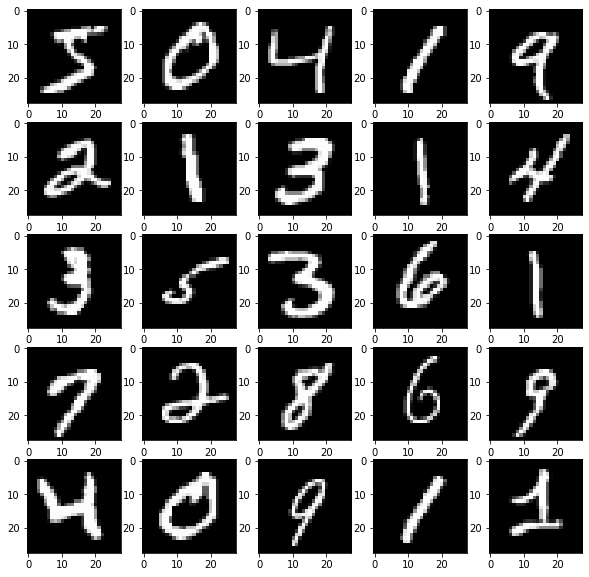

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

현재 우리가 받아온 MNIST 테스트 데이터는 총 6만장의 이미지가 28x28 행렬 데이터로 이루어져 있다.

In [24]:
x_train.shape

(60000, 28, 28)

이 28x28 행렬을 학습하기 위해서는 784x1 행렬로 변환해야 하는데 이 작업을 numpy에서는 reshape라는 함수를 통해 할 수 있게 해주었다.

In [28]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [33]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [47]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=1, 
          verbose=1, 
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('loss: ', score[0])
print('accuracy: ', score[1])

ValueError: Error when checking target: expected dense_19 to have 2 dimensions, but got array with shape (60000, 10, 10, 10, 10)